# Do-It-Yourself

In [1]:
import geopandas as gpd
import contextily as cx
from pysal.lib import examples
from pysal.lib import weights
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Task I: NYC Geodemographics

We are going to try to get at the (geographic) essence of New York City. For that, we will rely on the same set up Census tracts for New York City we used {ref}`a few blocks ago <diy_E:tracts>`. Once you have the `nyc` object loaded, create a geodemographic classification using the following variables:

- `european`: Total Population White
- `asian`: Total Population Asian American
- `american`: Total Population American Indian
- `african`: Total Population African American
- `hispanic`: Total Population Hispanic
- `mixed`: Total Population Mixed race
- `pacific`: Total Population Pacific Islander

For this, make sure you standardise the table by the size of each tract. That is, compute a column with the total population as the sum of all the ethnic groups and divide each of them by that column. This way, the values will range between 0 (no population of a given ethnic group) and 1 (all the population in the tract is of that group).

Once this is ready, get to work with the following tasks:

1. Pick a number of clusters (e.g. 10)
1. Run K-Means for that number of clusters
1. Plot the different clusters on a map
1. Analyse the results: 
    - *What do you find?*
    - *What are the main characteristics of each cluster?*
    - *How are clusters distributed geographically?*
    - *Can you identify some groups concentrated on particular areas (e.g. China Town, Little Italy)?*

### Task I Answers

In [2]:
# Load example (this automatically downloads if not available)
nyc_data = examples.load_example("NYC Socio-Demographics")
# Print the paths to all the files in the dataset
nyc_data.get_file_list()
nyc_data.get_path("NYC_Tract_ACS2008_12.prj")
nyc = gpd.read_file(nyc_data.get_path("NYC_Tract_ACS2008_12.shp"))

ethnicities = ['european', 'asian', 'american', 'african', 'hispanic', 'mixed', 'pacific']

# Compute standardised population
nyc['total_pop'] = nyc[ethnicities].sum(axis=1)

for col in ethnicities:
    nyc[col + '_standard'] = nyc[col] / nyc['total_pop']

In [3]:
nyc.crs = 'epsg:4326'

##### Run K-Means on 7 clusters

In [4]:
kmeans = KMeans(n_clusters=7, random_state=111)

kmeans.fit(nyc[ethnicities])

nyc['clusters'] = kmeans.labels_

/home/tristannew/code/gds_course/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##### Plot clusters

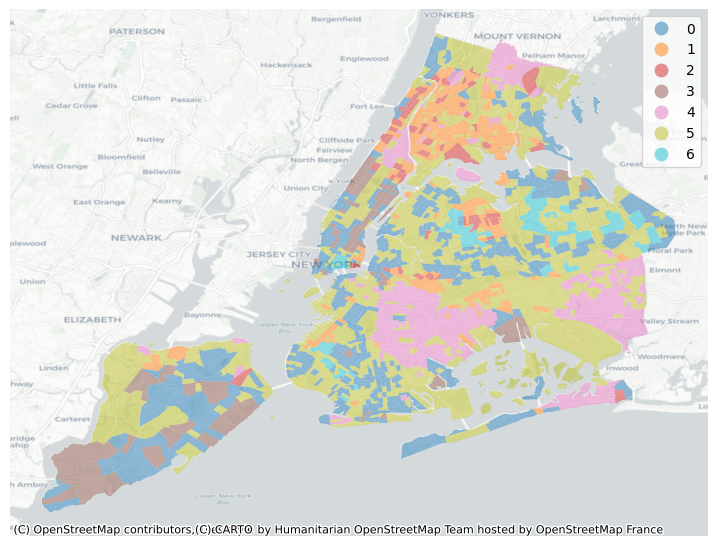

In [5]:
f, ax = plt.subplots(1, figsize=(9,9))

nyc.plot(column='clusters', categorical=True, ax=ax, legend=True, alpha=0.5)

ax.set_axis_off()

cx.add_basemap(ax=ax, crs=nyc.crs)
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron, crs=nyc.crs)

##### Analyse the results

In [6]:
groups = nyc.groupby('clusters')[[item + '_standard' for item in ethnicities]].mean()
groups.T

clusters,0,1,2,3,4,5,6
european_standard,0.702427,0.212156,0.250703,0.781462,0.085516,0.415080,0.243369
asian_standard,0.108044,0.053954,0.042447,0.078876,0.021495,0.158718,0.523077
american_standard,0.002088,0.004875,0.003257,0.001452,0.002537,0.004564,0.004445
african_standard,0.034363,0.204559,0.157861,0.030643,0.736888,0.183264,0.030258
hispanic_standard,0.134016,0.494937,0.512026,0.088375,0.133724,0.209979,0.176585
mixed_standard,0.018852,0.029091,0.033534,0.019027,0.019264,0.027792,0.021921
pacific_standard,0.000209,0.000427,0.000173,0.000166,0.000576,0.000604,0.000345


1. There are quite distinct areas of cluster 4 appearing around the Brooklyn ish area and Laurelton. Cluster 4 seems to be categorised as being composed almost entirely of the African community (74%), with a Hispanic presence (13%).
2. Staten Island is mainly inhabited by clusters 5, 0 and 3. CLusters 0 is mainly European (70%), with an Asian (11%) and Hispanic (13%) presence. Cluster 0 takes up, I think the posh parts like Travis-Chelsea? It is also the most common cluster by the looks of it. Cluster 3 is the same as Cluster 0 largely, except it is more European (78%) and less Asian/Hispanic. Cluster 3 takes up Pleasant Plains. Cluster 5 seems to be the most common cluster, consisting mainly of Europeans (42%) with a similar presence of Hispanic, Asian and African communities.
3. Cluster 6 takes up small pockets of NYC and is characterised by a presence of mainly Asian (52%) and some European and Hispanic.
4. I need to brush up on my NYC geography to figure out where is what. 

## Task II: Regionalisation of Dar Es Salaam

For this task we will travel to Tanzania's Dar Es Salaam. We are using a dataset assembled to describe the built environment of the city centre. Let's load up the dataset before anything:

````{margin}
```{admonition} Important
Make sure you are connected to the internet when you run this cell
```
````

In [10]:
# Read the file in
dar = gpd.read_file(
    "http://darribas.org/gds_course/content/data/dar_es_salaam.geojson"
)

````{admonition} Alternative
Instead of reading the file directly off the web, it is possible to download it manually, store it on your computer, and read it locally. To do that, you can follow these steps:
1. Download the file by right-clicking on <a href="../data/dar_es_salaam.geojson"> this link </a> and saving the file
1. Place the file on the _same folder as the notebook_ where you intend to read it
1. Replace the code in the cell above by:
```python
br = gpd.read_file("dar_es_salaam.geojson")
```
````


Geographically, this is what we are looking at:

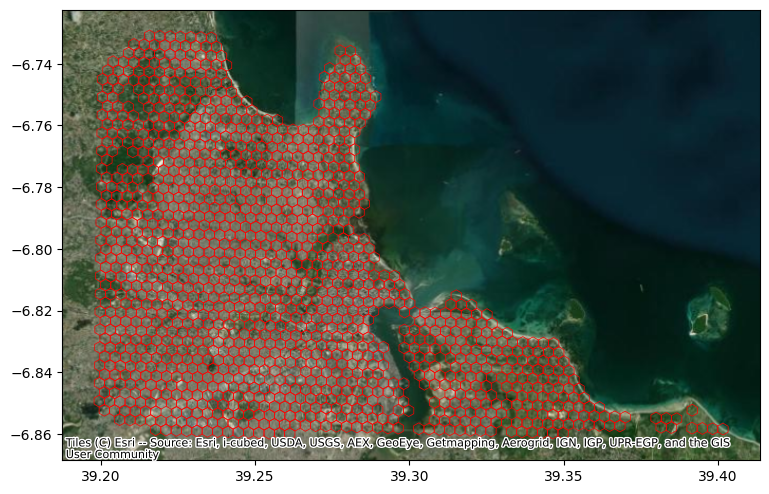

In [11]:
ax = dar.plot(
    facecolor="none", 
    edgecolor="red",
    linewidth=0.5,
    figsize=(9, 9)
)
cx.add_basemap(
    ax, 
    crs=dar.crs, 
    source=cx.providers.Esri.WorldImagery
)


We can inspect the table:

In [12]:
dar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              1291 non-null   object  
 1   id                 1291 non-null   object  
 2   street_length      1291 non-null   float64 
 3   street_linearity   1291 non-null   float64 
 4   building_density   1291 non-null   float64 
 5   building_coverage  1291 non-null   float64 
 6   geometry           1291 non-null   geometry
dtypes: float64(4), geometry(1), object(2)
memory usage: 70.7+ KB


Two main aspects of the built environment are considered: the street network and buildings. To capture those, the following variables are calculated at for the H3 hexagonal grid system, zoom level 8:

- Building density: number of buildings per hexagon
- Building coverage: proportion of the hexagon covered by buildings
- Street length: total length of streets within the hexagon
- Street linearity: a measure of how regular the street network is

With these at hand, your task is the following:

> *Develop a regionalisation that partitions Dar Es Salaam based on its built environment*

```{margin}
These are only guidelines, feel free to improvise and go beyond what's set. The sky is the limit!
```
For that, you can follow these suggestions:

- Create a spatial weights matrix to capture spatial relationships between hexagons
- Set up a regionalisation algorithm with a given number of clusters (e.g. seven)
- Generate a geography that contains only the boundaries of each region and visualise it (ideally with a satellite image as basemap for context)
- Rinse and repeat with several combinations of variables and number of clusters
- Pick your best. *Why have you selected it? What does it show? What are the main groups of areas based on the built environment?*

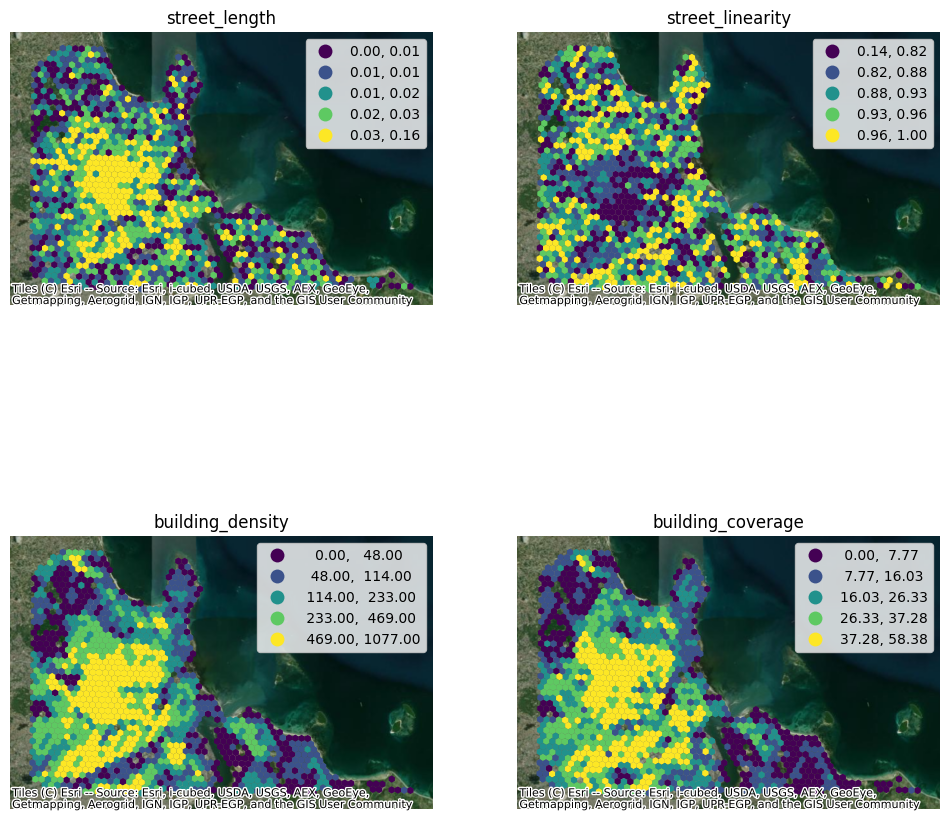

In [20]:
# Create side by side choropleths for each column.
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

axs = axes.flatten()

for index, col in enumerate(["street_length", "street_linearity", "building_density", "building_coverage"]):
    ax = axs[index]
    dar.plot(column=col, scheme='Quantiles', ax=ax, legend=True)
    ax.set_axis_off()
    ax.set_title(col)
    cx.add_basemap(crs=dar.crs, ax=ax, source=cx.providers.Esri.WorldImagery)
                   #=cx.providers.CartoDB.Voyager)
    

In [ ]:
# In terms of choosing which weights matrix to make, they all will be fairly similar (i think!) due to the hexagonal shape. 
# I think Queen will produce 5 more than Rook because of the vertices of a hexagon but KNN and distance would be similar depending on the distance chosen
# the nearest neighbors will be equidistant since they are all the same size. So choosing x distance is also choosing x nearest neighbors. That is always
# true though.

In [ ]:
# look at global and local autocorrelation for each variable to see if it would be useful for regionalisation and Morans I for each one.